#Brain Stroke Detection

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 1 - Data Preprocessing

In [4]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)


In [5]:
#importing dataset
df = pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data (1).csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [8]:
# handling null vaues in BMI
df['bmi'].value_counts()

,count
bmi,
28.7,41
28.4,38
26.7,37
27.6,37
26.1,37
...,...
48.7,1
49.2,1
51.0,1


In [9]:
df['bmi'].describe()

,bmi
count,4909.000000
mean,28.893237
std,7.854067
min,10.300000
25%,23.500000
50%,28.100000
75%,33.100000
max,97.600000


In [10]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


Features Selection

In [11]:
df.drop('id',axis = 1 , inplace = True)

In [12]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


Outlier Removal

<Axes: >

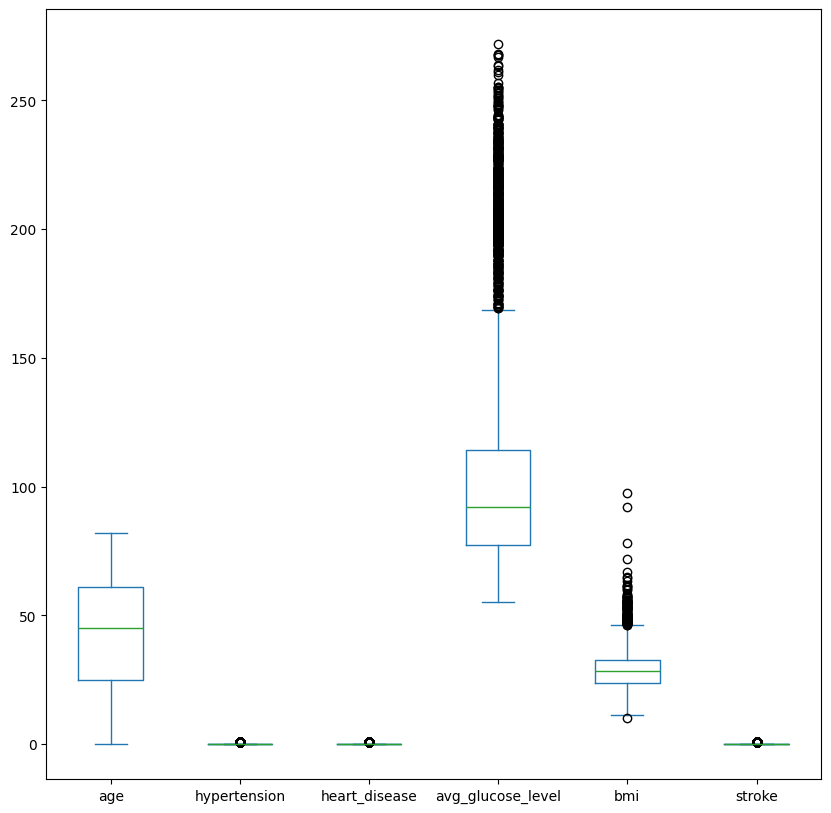

In [13]:
#//Boxplot only shows the numeric data
df.plot(kind='box')

In [14]:
df['avg_glucose_level'].describe()

,avg_glucose_level
count,5110.000000
mean,106.147677
std,45.283560
min,55.120000
25%,77.245000
50%,91.885000
75%,114.090000
max,271.740000


In [15]:
df[df['avg_glucose_level']>114.090000] #We will keep all the data as it is in large amount

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5071,Male,81.0,0,0,Yes,Private,Rural,135.32,35.800000,Unknown,0
5076,Female,34.0,0,0,Yes,Private,Rural,174.37,23.000000,never smoked,0
5086,Female,51.0,0,0,Yes,Private,Urban,152.56,21.800000,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0


Label Encoding

In [16]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [18]:
df['gender'] = enc.fit_transform(df['gender'])
df['ever_married'] = enc.fit_transform(df['ever_married'])
df['work_type'] = enc.fit_transform(df['work_type'])
df['Residence_type'] = enc.fit_transform(df['Residence_type'])
df['smoking_status'] = enc.fit_transform(df['smoking_status'])

In [19]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


Splitting the data for train and test

In [21]:
X = df.iloc[: , :-1]
Y = df.iloc[: , -1]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [23]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2285,1,49.0,0,0,1,2,0,79.64,28.893237,3
4733,1,67.0,0,0,1,2,0,83.16,25.500000,1
3905,1,78.0,0,0,1,2,1,208.85,24.400000,1
4700,1,47.0,0,0,1,2,0,110.14,30.500000,3
4939,0,59.0,0,0,1,2,1,71.08,28.100000,2
...,...,...,...,...,...,...,...,...,...,...
1180,0,62.0,0,0,1,2,0,82.57,36.000000,1
3441,0,59.0,0,0,1,3,1,90.06,28.900000,3
1344,1,47.0,0,0,1,2,0,86.37,39.200000,3
4623,1,25.0,0,0,1,0,1,166.38,23.100000,2


In [24]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2413,0,58.00,0,0,1,2,0,100.42,39.500000,3
1141,1,57.00,0,0,1,2,0,90.06,29.800000,0
146,1,65.00,0,0,1,3,1,68.43,28.893237,1
3883,0,1.64,0,0,0,4,1,69.89,18.100000,0
1044,0,79.00,0,0,1,0,1,93.89,30.400000,2
...,...,...,...,...,...,...,...,...,...,...
2261,1,59.00,0,0,1,2,1,60.35,25.900000,1
4712,1,57.00,0,0,1,2,1,93.04,29.200000,2
4971,0,63.00,0,0,1,2,1,57.06,37.900000,2
2224,1,57.00,0,0,1,2,0,76.28,31.400000,1


In [25]:
Y_train

,stroke
2285,0
4733,0
3905,0
4700,0
4939,0
...,...
1180,0
3441,0
1344,0
4623,0


In [26]:
Y_test

,stroke
2413,0
1141,0
146,1
3883,0
1044,0
...,...
2261,0
4712,0
4971,0
2224,0


Normalization

In [27]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [28]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [29]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [30]:
X_train_std

array([[ 1.19359699,  0.2521852 , -0.33069968, ..., -0.58626884,
         0.00238781,  1.51158251],
       [ 1.19359699,  1.04686385, -0.33069968, ..., -0.50843521,
        -0.44065504, -0.35191245],
       [ 1.19359699,  1.5325008 , -0.33069968, ...,  2.27080023,
        -0.58427812, -0.35191245],
       ...,
       [ 1.19359699,  0.16388757, -0.33069968, ..., -0.43745625,
         1.34810513,  1.51158251],
       [ 1.19359699, -0.80738634, -0.33069968, ...,  1.33171097,
        -0.75401449,  0.57983503],
       [-0.83780372,  1.62079843, -0.33069968, ..., -0.74171498,
        -0.16646553,  0.57983503]])

Model Creation

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [32]:

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Classifier' : GradientBoostingClassifier(random_state=0),
    'K Nearest Neighbors' : KNeighborsClassifier(),
    'Support Vector Classifier' : SVC()
}


In [33]:
for name, model in models.items():
    # start = time.time()
    model.fit(X_train_std, Y_train)
    y_predict = model.predict(X_test_std)
    print(name);
    print("Accuracy: ", accuracy_score(Y_test, y_predict)," \n")

Logistic Regression
Accuracy:  0.9383561643835616  

Decision Tree
Accuracy:  0.9041095890410958  

Random Forest
Accuracy:  0.9373776908023483  

Gradient Classifier
Accuracy:  0.9383561643835616  

K Nearest Neighbors
Accuracy:  0.9344422700587084  

Support Vector Classifier
Accuracy:  0.9393346379647749  



In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix

for name, model in models.items():
    model.fit(X_train_std, Y_train)
    y_predict = model.predict(X_test_std)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_predict)

    # Generate confusion matrix
    cm = confusion_matrix(Y_test, y_predict)

    # Display results
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("\n")

Model: Logistic Regression
Accuracy: 0.9384
Confusion Matrix:
[[959   1]
 [ 62   0]]


Model: Decision Tree
Accuracy: 0.9022
Confusion Matrix:
[[916  44]
 [ 56   6]]


Model: Random Forest
Accuracy: 0.9374
Confusion Matrix:
[[958   2]
 [ 62   0]]


Model: Gradient Classifier
Accuracy: 0.9384
Confusion Matrix:
[[959   1]
 [ 62   0]]


Model: K Nearest Neighbors
Accuracy: 0.9344
Confusion Matrix:
[[955   5]
 [ 62   0]]


Model: Support Vector Classifier
Accuracy: 0.9393
Confusion Matrix:
[[960   0]
 [ 62   0]]




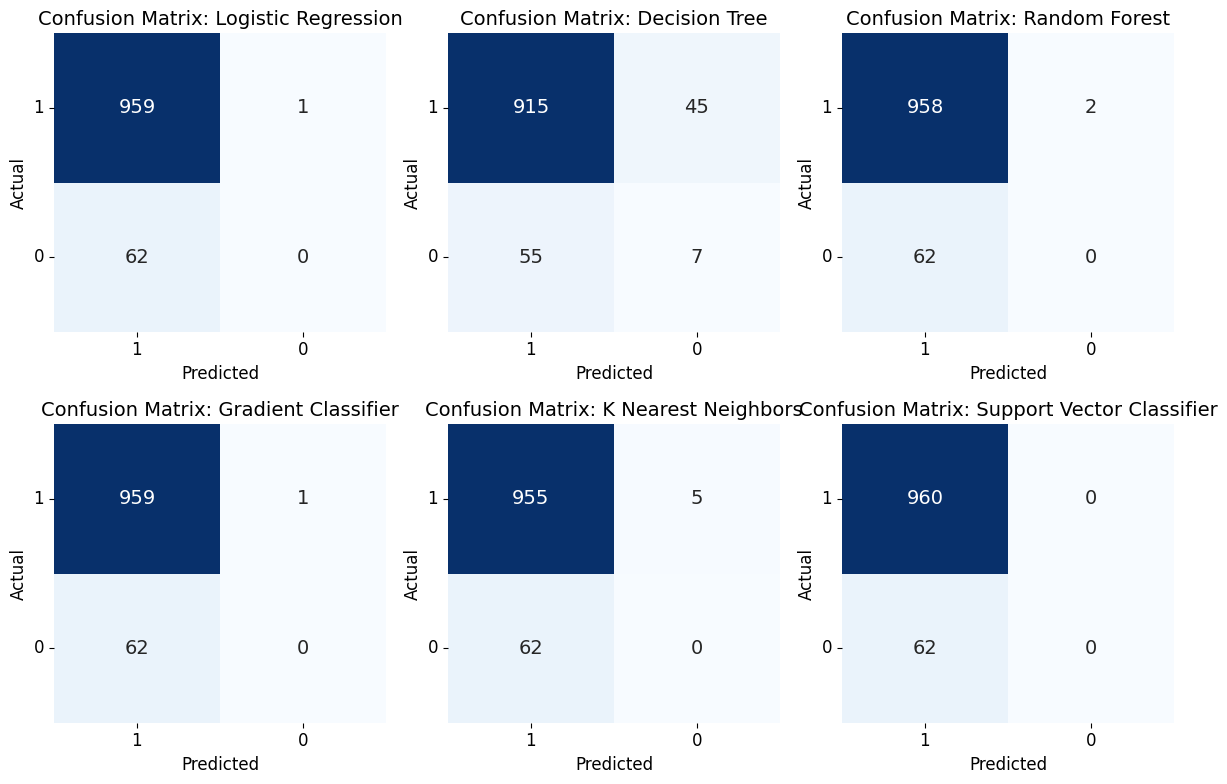

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrices for each model
confusion_matrices = {
    "Logistic Regression": np.array([[959, 1], [62, 0]]),
    "Decision Tree": np.array([[915, 45], [55, 7]]),
    "Random Forest": np.array([[958, 2], [62, 0]]),
    "Gradient Classifier": np.array([[959, 1], [62, 0]]),
    "K Nearest Neighbors": np.array([[955, 5], [62, 0]]),
    "Support Vector Classifier": np.array([[960, 0], [62, 0]])
}

# Update font sizes
plt.rcParams.update({'font.size': 12})  # Global font size for axis labels, etc.

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()

for i, (model, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                ax=axes[i], annot_kws={"size": 14})  # Increase text size inside the matrix
    axes[i].set_title(f"Confusion Matrix: {model}", fontsize=14)  # Increase title size
    axes[i].set_xlabel("Predicted", fontsize=12)  # Increase x-axis label size
    axes[i].set_ylabel("Actual", fontsize=12)     # Increase y-axis label size

    # Set the labels on the x-axis (Predicted) and y-axis (Actual)
    axes[i].set_xticklabels(["1", "0"], fontsize=12)  # Swap predicted labels
    axes[i].set_yticklabels(["1", "0"], fontsize=12, rotation=0)  # Swap actual labels, no rotation

plt.tight_layout()
plt.show()


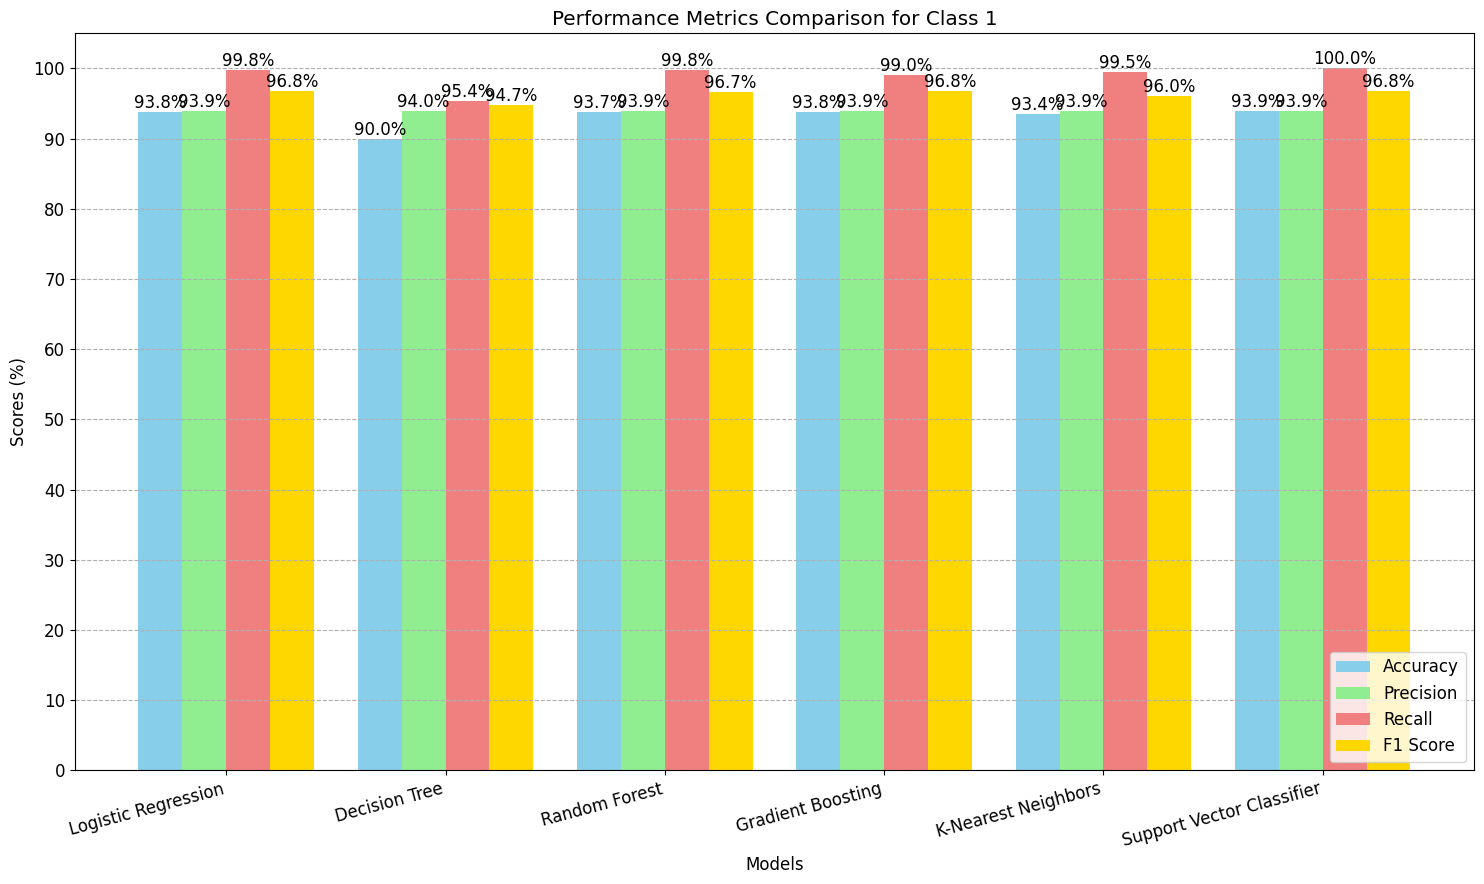

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Models and metrics for each class
models = ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "K-Nearest Neighbors", "Support Vector Classifier"]

# Class 0 Metrics (multiplied by 100 to reflect percentage values)
accuracy = [93.84, 90.0, 93.74, 93.84, 93.44, 93.9]
precision_0 = [93.93, 94.0, 93.9, 93.9, 93.9, 93.9]
recall_0 = [99.84, 95.42, 99.79, 99.0, 99.48, 100.0]
f1_score_0 = [96.83, 94.73, 96.7, 96.8, 96.0, 96.8]

x = np.arange(len(models))
width = 0.2

# Plot for Class 1
fig, ax = plt.subplots(figsize=(15, 9))

bars_0 = [
    ax.bar(x - 1.5 * width, accuracy, width, label='Accuracy', color='skyblue'),
    ax.bar(x - 0.5 * width, precision_0, width, label='Precision', color='lightgreen'),
    ax.bar(x + 0.5 * width, recall_0, width, label='Recall', color='lightcoral'),
    ax.bar(x + 1.5 * width, f1_score_0, width, label='F1 Score', color='gold')
]

# Adding percentages on top of each bar for Class 1
for bars in bars_0:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.1f}%',
            ha='center',
            va='bottom'
        )

ax.set_xlabel('Models')
ax.set_ylabel('Scores (%)')
ax.set_title('Performance Metrics Comparison for Class 1')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15, ha='right')
ax.set_yticks(np.arange(0, 101, 10))
ax.legend(loc='lower right')
ax.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()